In [6]:
!wget -O berlin_housing_analysis.ipynb https://raw.githubusercontent.com/mam863/Hauspreise/main/berlin_housing_analysis.ipynb


--2025-07-04 06:08:54--  https://raw.githubusercontent.com/mam863/Hauspreise/main/berlin_housing_analysis.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-04 06:08:54 ERROR 404: Not Found.



In [7]:
from google.colab import files
uploaded = files.upload()

Saving wohnungen_plus_population.csv to wohnungen_plus_population (2).csv


In [8]:
import pandas as pd

df = pd.read_csv('wohnungen_plus_population.csv', delimiter=';')
df.head()


,energy,heating,price,area,rooms,zipcode,construction_year,level,Country,City,Borough,Neighborhood,price_per_sqm,distance_to_center_km,new_apartment_per_borough,population_per_borough
0,Oel,Zentralheizung,249000,64,3,13505,1971,2,Germany,Berlin,Reinickendorf,Konradshöhe,"3890,625","14,398",509,274.098
1,Gas,"Fussbodenheizung, offener",1295000,"136,06",4,10405,1900,5,Germany,Berlin,Pankow,Prenzlauer Berg,"9517,859768","2,171",1610,427.276
2,Oel,Zentralheizung,349000,86,3,13583,1966,2,Germany,Berlin,Spandau,Falkenhagener Feld,"4058,139535","17,424",740,259.277
3,unbekannt,unbekannt,799000,"99,65",4,13585,1956,3,Germany,Berlin,Spandau,Spandau,"8018,063221","14,349",740,259.277
4,unbekannt,unbekannt,297000,75,3,13591,1995,1,Germany,Berlin,Spandau,Staaken,3960,"18,317",740,259.277


In [9]:
## 2. Data Understanding - Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import folium
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as XGBRegressor
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('wohnungen_plus_population.csv', sep=';')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (4677, 16)


,energy,heating,price,area,rooms,zipcode,construction_year,level,Country,City,Borough,Neighborhood,price_per_sqm,distance_to_center_km,new_apartment_per_borough,population_per_borough
0,Oel,Zentralheizung,249000,64,3,13505,1971,2,Germany,Berlin,Reinickendorf,Konradshöhe,"3890,625","14,398",509,274.098
1,Gas,"Fussbodenheizung, offener",1295000,"136,06",4,10405,1900,5,Germany,Berlin,Pankow,Prenzlauer Berg,"9517,859768","2,171",1610,427.276
2,Oel,Zentralheizung,349000,86,3,13583,1966,2,Germany,Berlin,Spandau,Falkenhagener Feld,"4058,139535","17,424",740,259.277
3,unbekannt,unbekannt,799000,"99,65",4,13585,1956,3,Germany,Berlin,Spandau,Spandau,"8018,063221","14,349",740,259.277
4,unbekannt,unbekannt,297000,75,3,13591,1995,1,Germany,Berlin,Spandau,Staaken,3960,"18,317",740,259.277


In [10]:
## Data Understanding - Exploratory Data Analysis

# Check dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   energy                     4677 non-null   object 
 1   heating                    4677 non-null   object 
 2   price                      4677 non-null   int64  
 3   area                       4677 non-null   object 
 4   rooms                      4677 non-null   int64  
 5   zipcode                    4677 non-null   int64  
 6   construction_year          4677 non-null   int64  
 7   level                      4677 non-null   int64  
 8   Country                    4677 non-null   object 
 9   City                       4677 non-null   object 
 10  Borough                    4677 non-null   object 
 11  Neighborhood               4677 non-null   object 
 12  price_per_sqm              4677 non-null   object 
 13  distance_to_center_km      4677 non-null   objec

In [11]:
# Statistical summary of numerical features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4677.0,587114.886893,635566.436988,34950.000,278029.000,399000.0,691300.000,1.590000e+07
rooms,4677.0,2.864871,1.581044,1.000,2.000,3.0,3.000,2.600000e+01
zipcode,4677.0,11868.368612,1329.014902,10115.000,10585.000,12109.0,13088.000,1.419900e+04
construction_year,4677.0,1950.125935,42.869645,1838.000,1909.000,1956.0,1981.000,2.025000e+03
level,4677.0,2.256361,2.794181,1.000,1.000,1.0,3.000,2.400000e+01
new_apartment_per_borough,4677.0,1176.636092,692.986883,345.000,638.000,884.0,1610.000,3.410000e+03
population_per_borough,4677.0,344.626502,49.766538,259.277,297.236,343.5,397.004,4.272760e+02


In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Sort by missing percentage in descending order
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Percentage', ascending=False)
missing_df


,Missing Values,Missing Percentage



energy Value Counts:
energy
unbekannt                    1923
Gas                          1423
Fernwaerme                    785
Oel                           413
Elektro                        39
Luft-/                         35
Fussbodenheizung               21
Blockheizkraftwerk             13
Solar                          12
Erdwaerme                       6
Fluessiggas                     2
Pellets                         2
Holz                            1
Fussbodenheizung, offener       1
Niedrigenergiehaus              1
Name: count, dtype: int64
Percentage of 'unbekannt' values: 41.12%


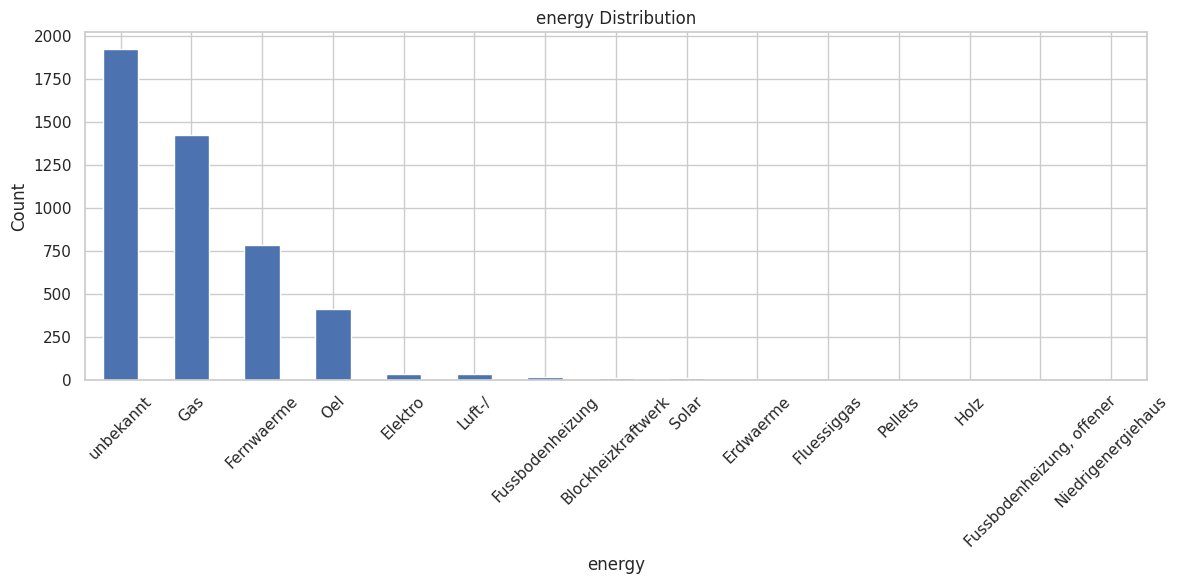


heating Value Counts:
heating
unbekannt                    1923
Zentralheizung               1843
Etagenheizung                 372
Fussbodenheizung              307
Heizungsart                    69
Kamin                          49
Waermepumpe                    34
Wasser-                        21
Niedrigenergiehaus             12
Kf                             12
Fussbodenheizung, offener      11
Etagenheizung, offener          8
Fertighaus                      4
Heizungsartoffener              4
Luft-/                          3
Minergie zertifiziert           2
Kohle                           1
Ofen                            1
Waermepumpe, offener            1
Name: count, dtype: int64
Percentage of 'unbekannt' values: 41.12%


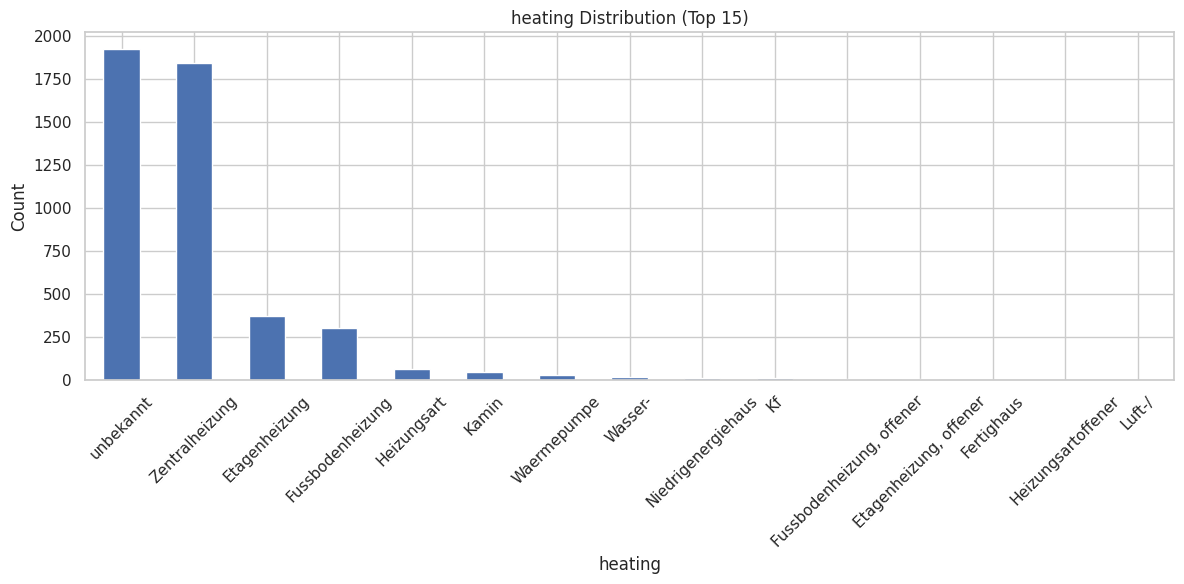


area Value Counts:
area
60        70
55        51
65        46
50        44
70        42
          ..
43,3       1
92,28      1
143,99     1
82,59      1
64,91      1
Name: count, Length: 2077, dtype: int64


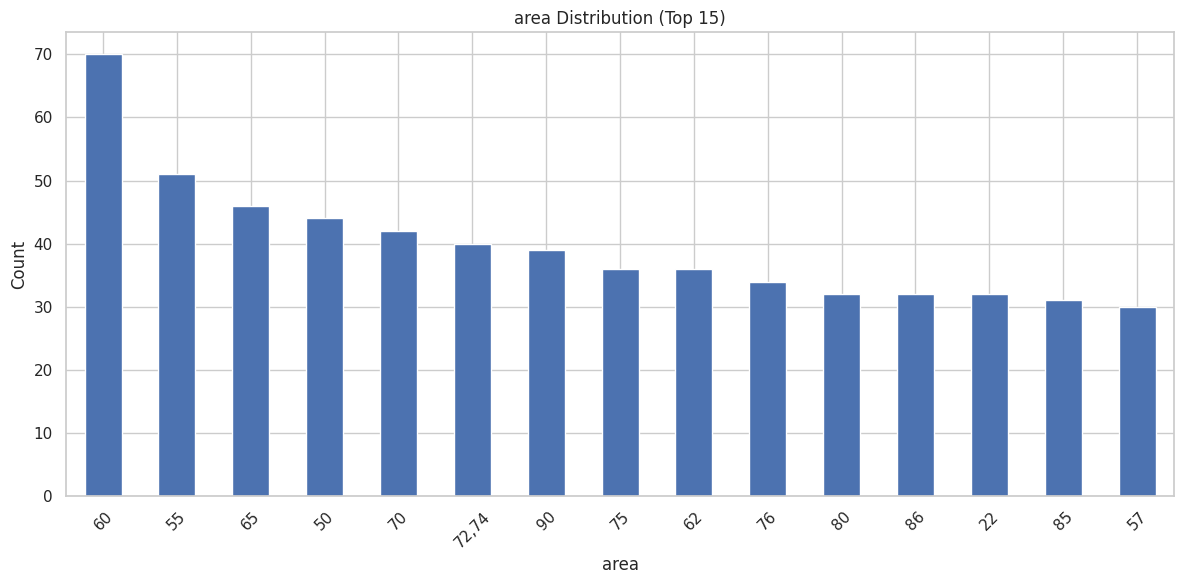


Country Value Counts:
Country
Germany    4677
Name: count, dtype: int64


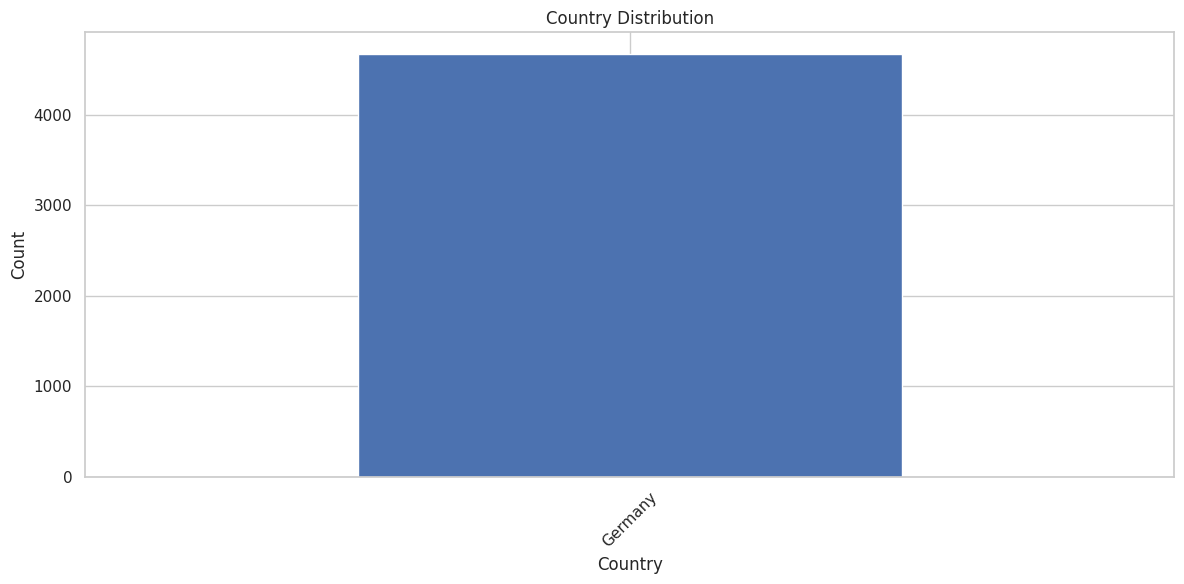


City Value Counts:
City
Berlin    4677
Name: count, dtype: int64


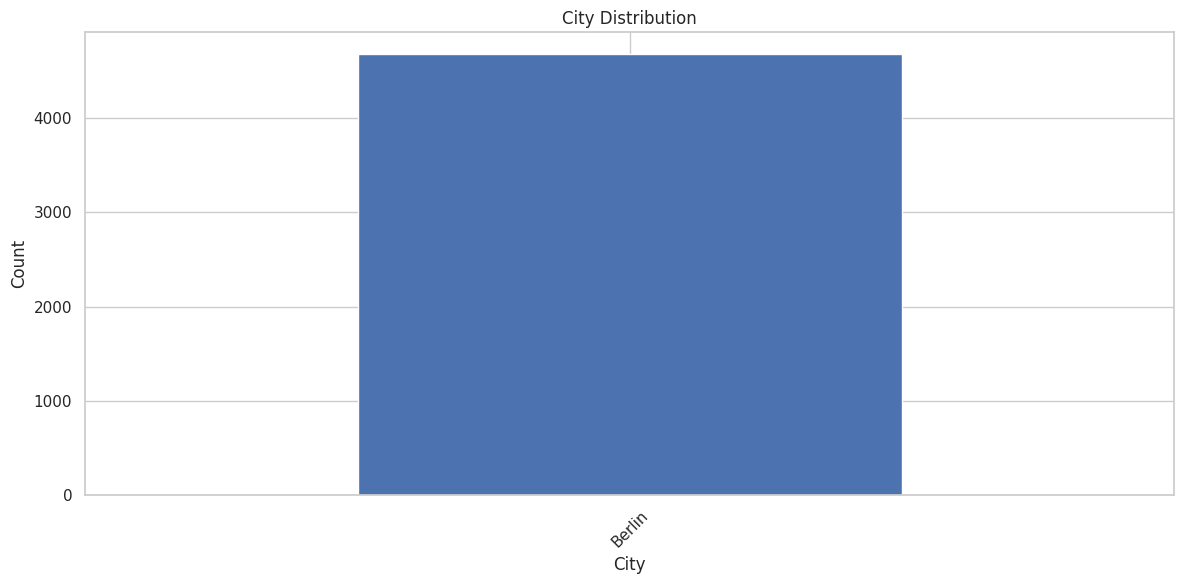


Borough Value Counts:
Borough
Charlottenburg-Wilmersdorf    815
Pankow                        717
Mitte                         563
Friedrichshain-Kreuzberg      540
Tempelhof-Schöneberg          527
Steglitz-Zehlendorf           455
Treptow-Köpenick              273
Neukölln                      245
Reinickendorf                 187
Spandau                       168
Lichtenberg                   145
Marzahn-Hellersdorf            42
Name: count, dtype: int64


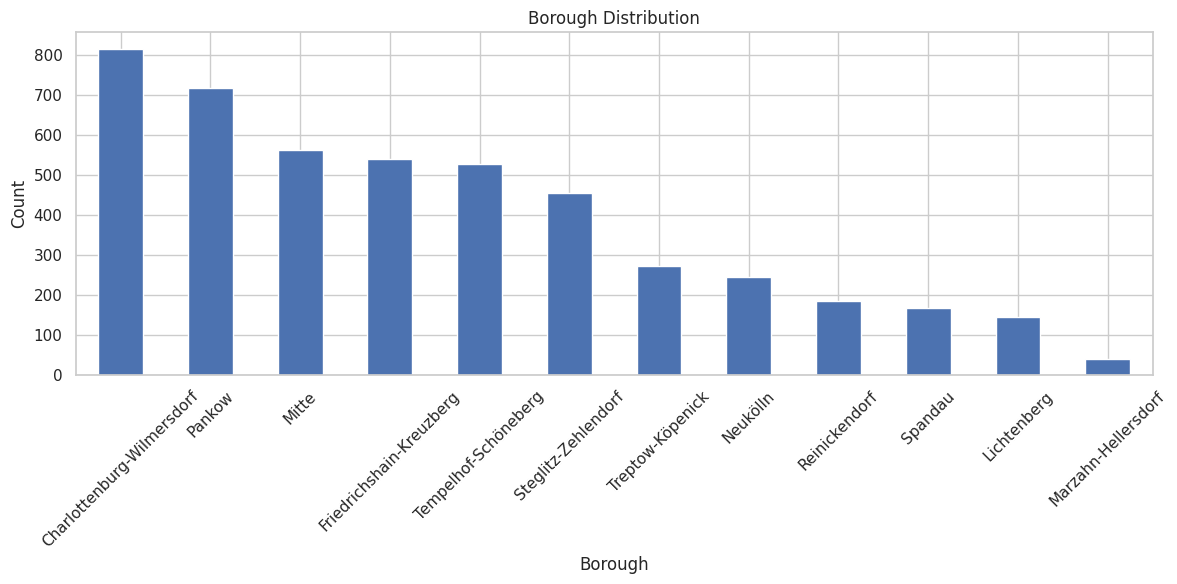


Neighborhood Value Counts:
Neighborhood
Friedrichshain     360
Charlottenburg     320
Wilmersdorf        254
Prenzlauer Berg    245
Mitte              239
                  ... 
Frohnau              3
Rahnsdorf            3
Blankenburg          2
Kaulsdorf            2
Falkenberg           2
Name: count, Length: 85, dtype: int64


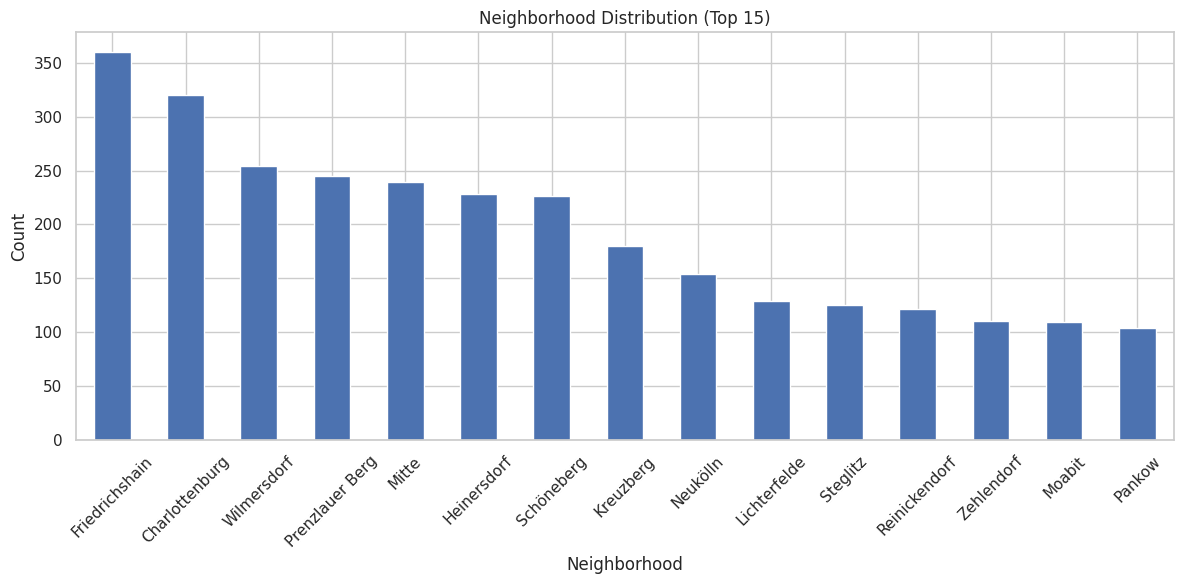


price_per_sqm Value Counts:
price_per_sqm
8800           44
8500           35
8750           21
8850           19
5000           15
               ..
9757,39645      1
7450,704225     1
7153,005464     1
9517,859768     1
4058,139535     1
Name: count, Length: 3540, dtype: int64


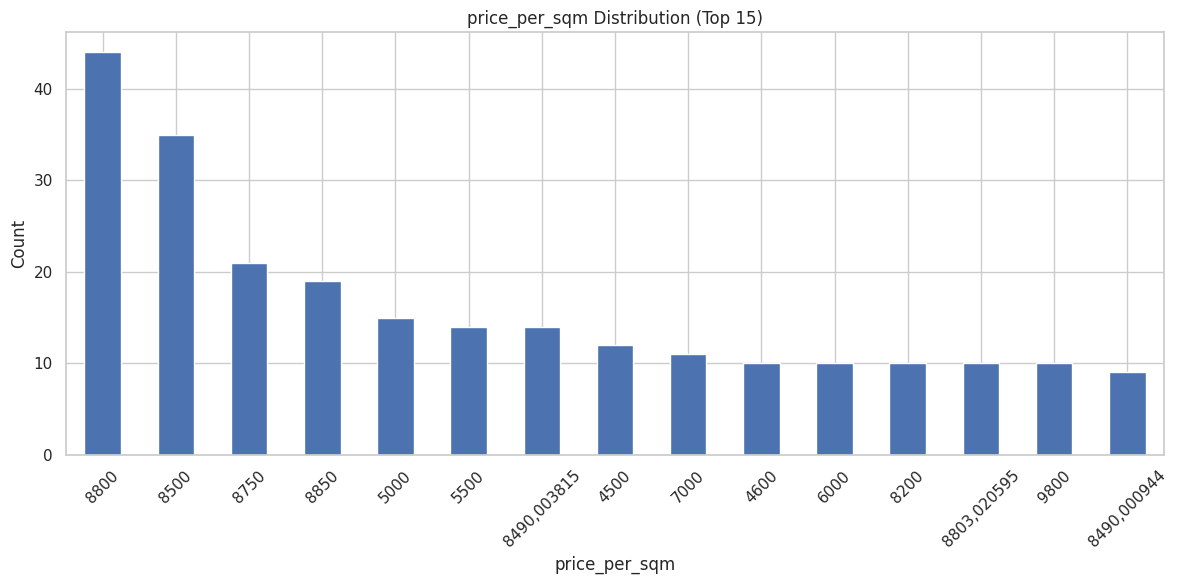


distance_to_center_km Value Counts:
distance_to_center_km
3,122     360
7,172     320
7,317     254
2,171     245
0         239
         ... 
14,940      3
19,524      3
7,964       2
12,554      2
10,991      2
Name: count, Length: 85, dtype: int64


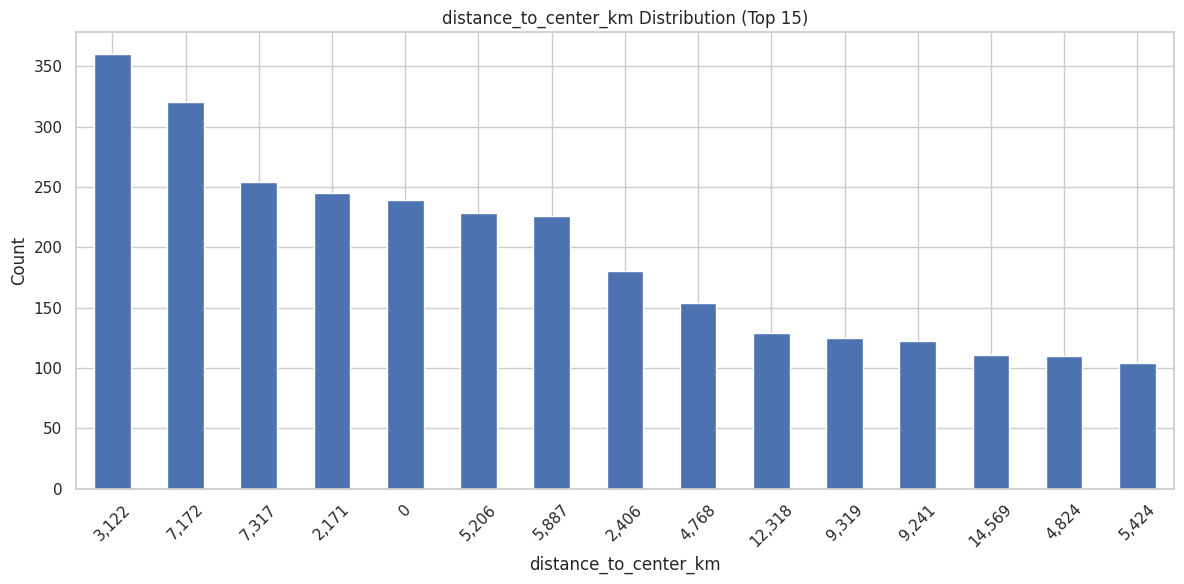

In [13]:
# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"\n{feature} Value Counts:")
    value_counts = df[feature].value_counts()
    print(value_counts)

    # Calculate percentage of 'unbekannt' (unknown) values if present
    if 'unbekannt' in value_counts.index:
        unknown_percentage = value_counts['unbekannt'] / value_counts.sum() * 100
        print(f"Percentage of 'unbekannt' values: {unknown_percentage:.2f}%")

    # Plot distribution
    plt.figure(figsize=(12, 6))
    if len(value_counts) > 15:
        # For features with many unique values, plot top 15
        value_counts.iloc[:15].plot(kind='bar', title=f'{feature} Distribution (Top 15)')
    else:
        value_counts.plot(kind='bar', title=f'{feature} Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


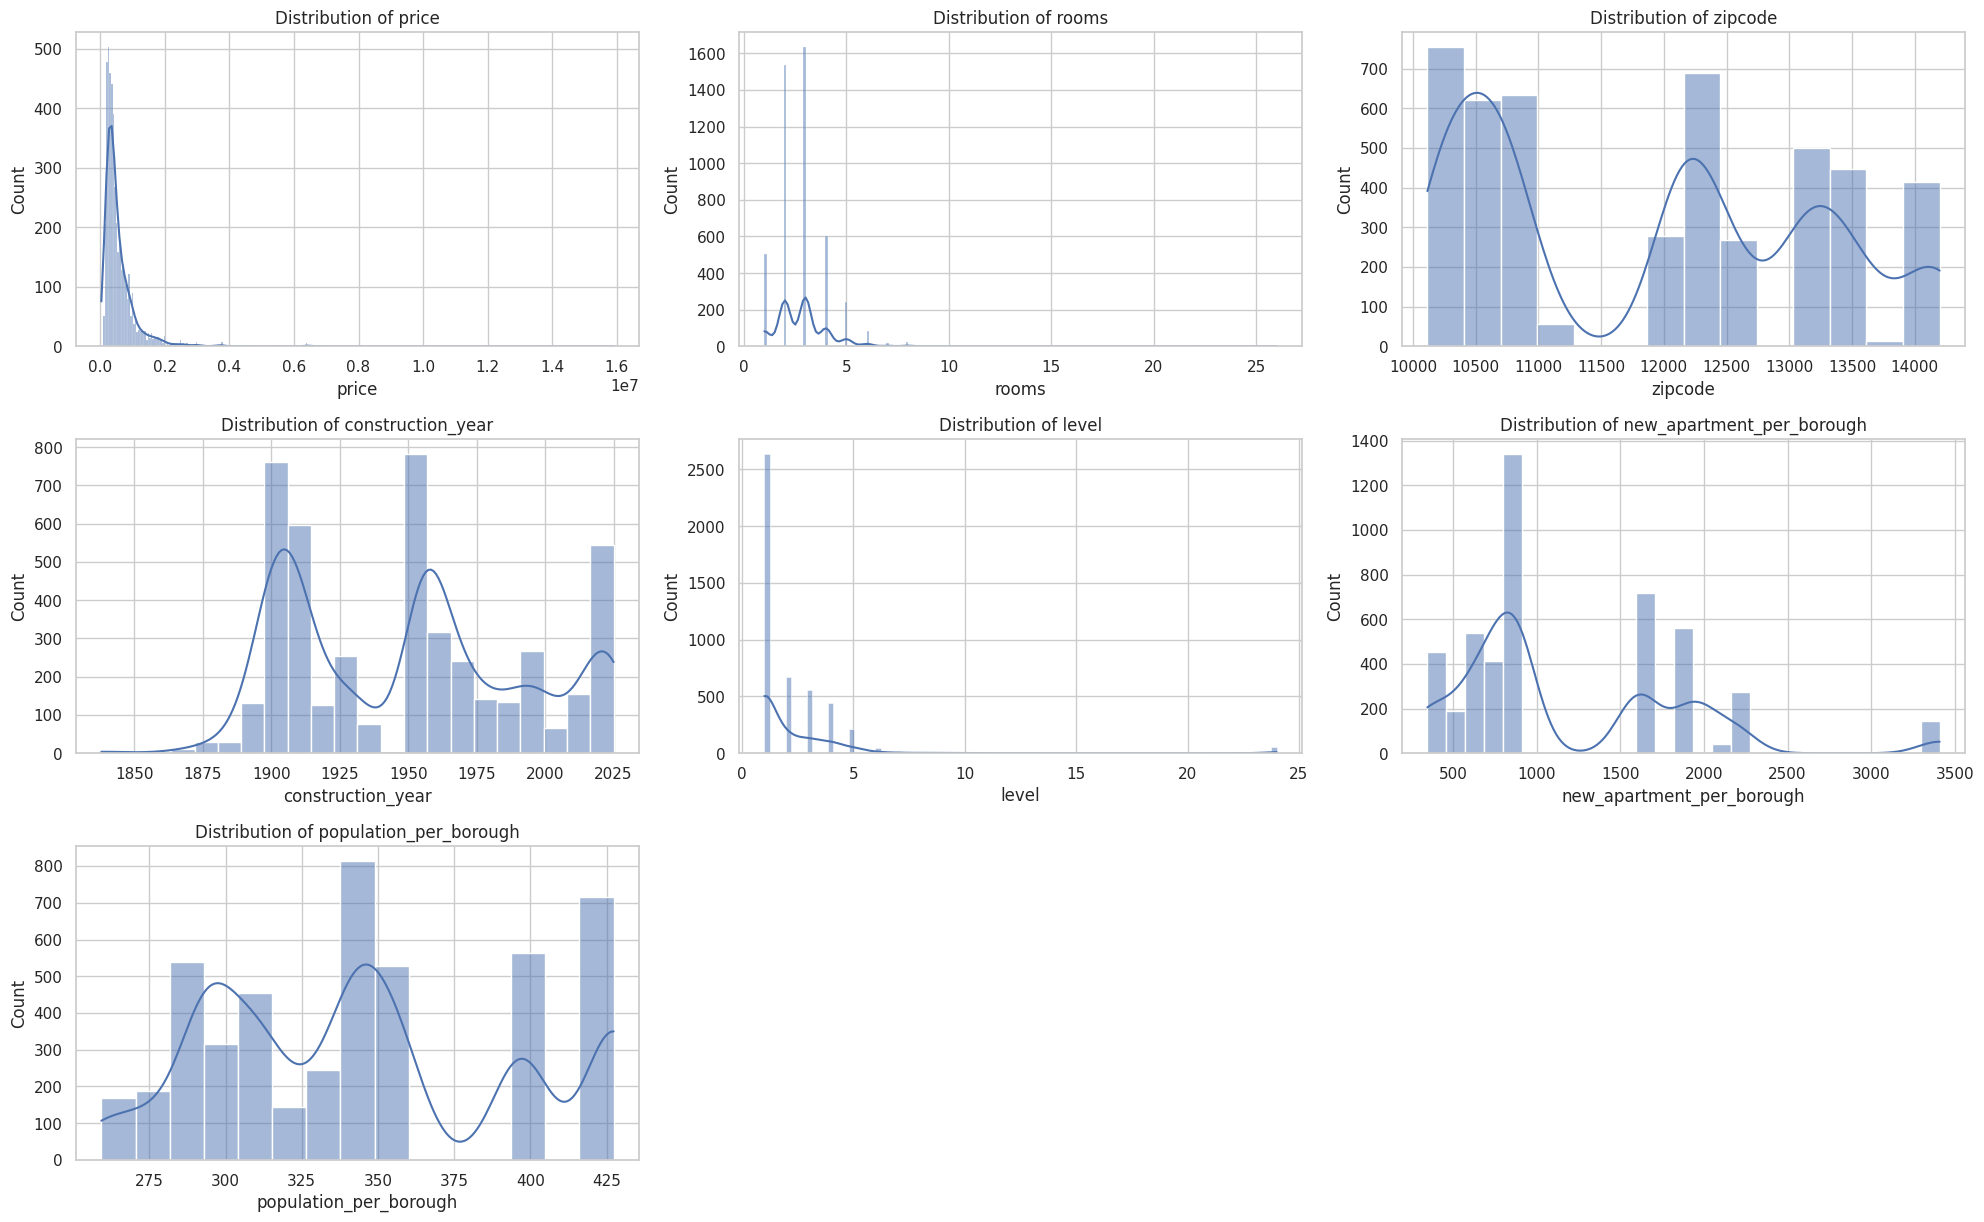

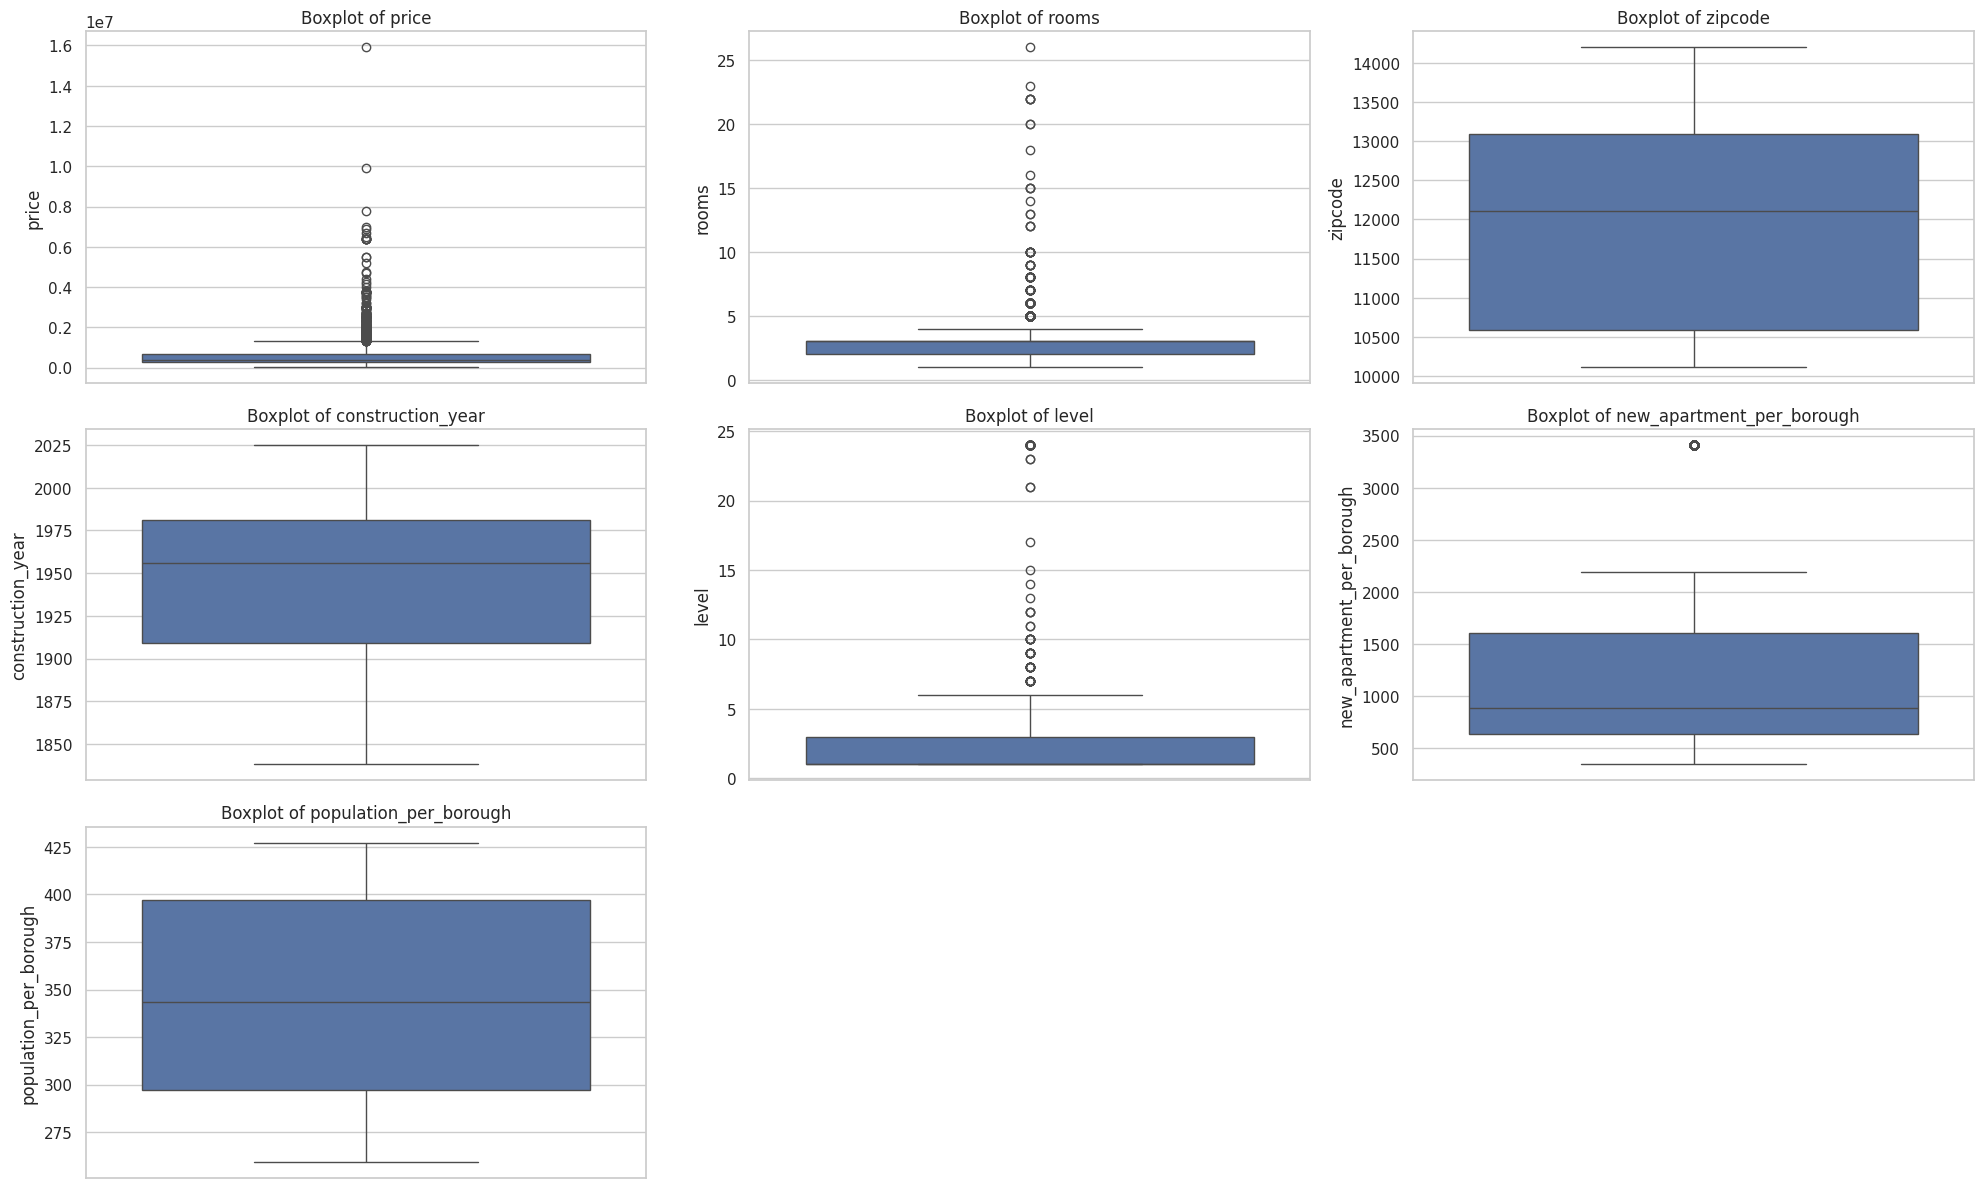

In [14]:
# Analyze numerical features distributions
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for all numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

# Boxplots for numerical features to identify outliers
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()


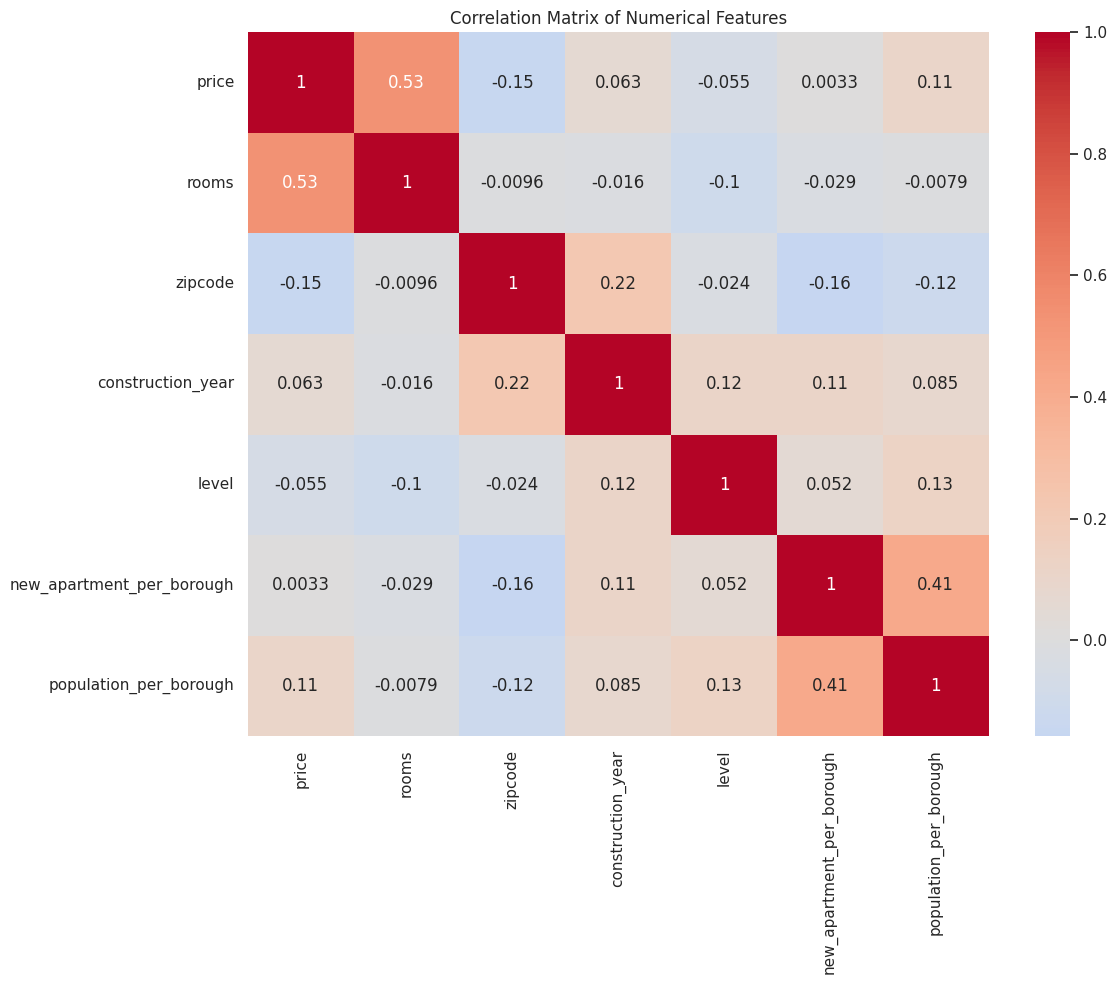


Strong correlations (|correlation| > 0.5):
rooms vs price: 0.53


In [15]:

# Correlation analysis between numerical features
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strong correlations (above 0.5 or below -0.5)
print("\nStrong correlations (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")



In [16]:
# Convert necessary columns to numeric
for col in ['price', 'price_per_sqm', 'population_per_borough', 'area', 'distance_to_center_km']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')


Berlin Borough Price Analysis


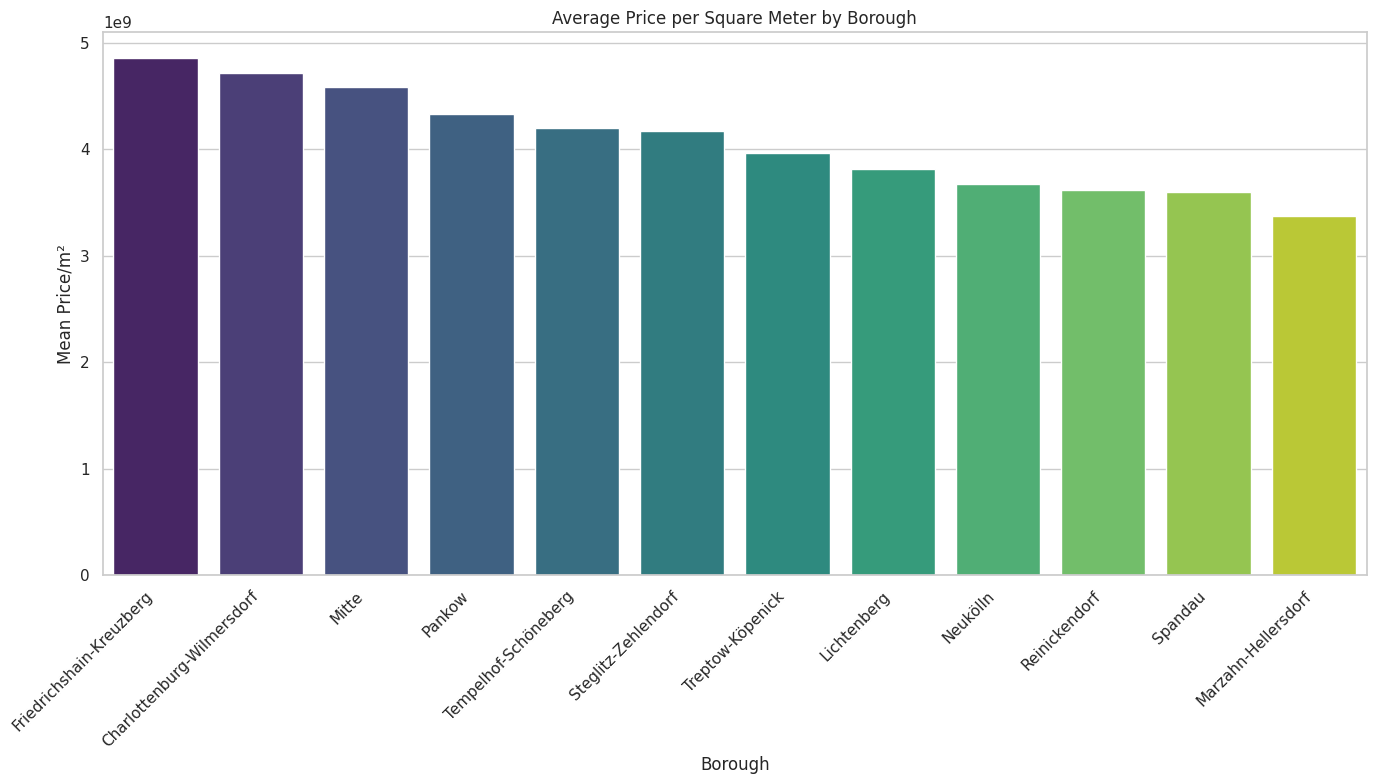

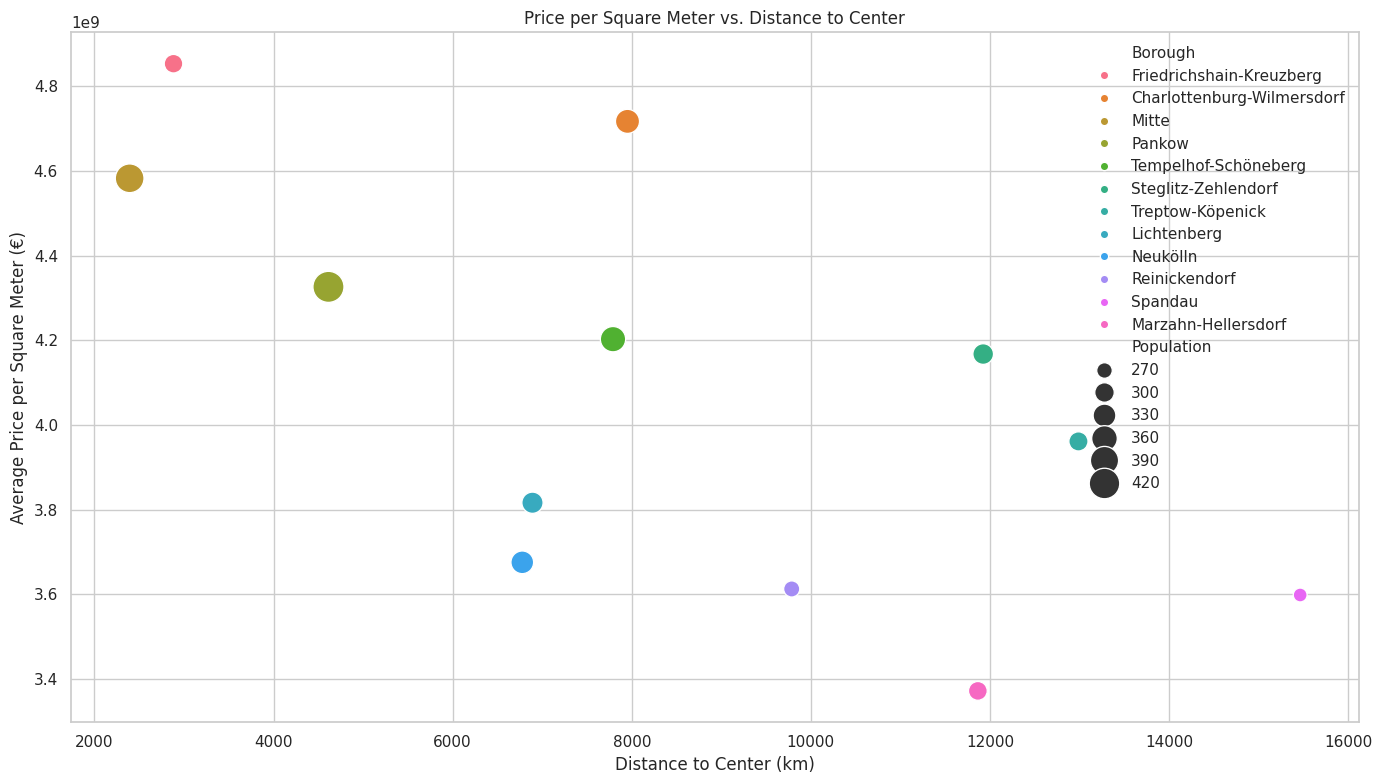

In [17]:
# Advanced district analysis
print("Berlin Borough Price Analysis")
borough_stats = df.groupby('Borough').agg({
    'price': ['mean', 'median', 'min', 'max', 'count'],
    'price_per_sqm': ['mean', 'median', 'min', 'max'],
    'population_per_borough': 'first',
    'area': 'mean',
    'distance_to_center_km': 'mean'
}).reset_index()

# Format the output for better readability
borough_stats.columns = ['Borough', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Count',
                         'Mean Price/m²', 'Median Price/m²', 'Min Price/m²', 'Max Price/m²',
                         'Population', 'Mean Area', 'Mean Distance to Center']
borough_stats = borough_stats.sort_values('Mean Price/m²', ascending=False)
borough_stats.reset_index(drop=True, inplace=True)
borough_stats

# Create a bar chart comparing average prices by borough
plt.figure(figsize=(14, 8))
sns.barplot(x='Borough', y='Mean Price/m²', data=borough_stats, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price per Square Meter by Borough')
plt.tight_layout()
plt.show()

# Create a scatter plot of price/m² vs distance to center
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Mean Distance to Center', y='Mean Price/m²', size='Population',
                hue='Borough', data=borough_stats, sizes=(100, 500))
plt.title('Price per Square Meter vs. Distance to Center')
plt.xlabel('Distance to Center (km)')
plt.ylabel('Average Price per Square Meter (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interactive visualization using Plotly
fig = px.scatter(borough_stats, x='Mean Distance to Center', y='Mean Price/m²',
                 size='Population', color='Borough', hover_name='Borough',
                 hover_data=['Mean Price', 'Count', 'Population'],
                 title='Borough Price Analysis with Population Size')
fig.update_layout(height=600, width=900)
fig.show()


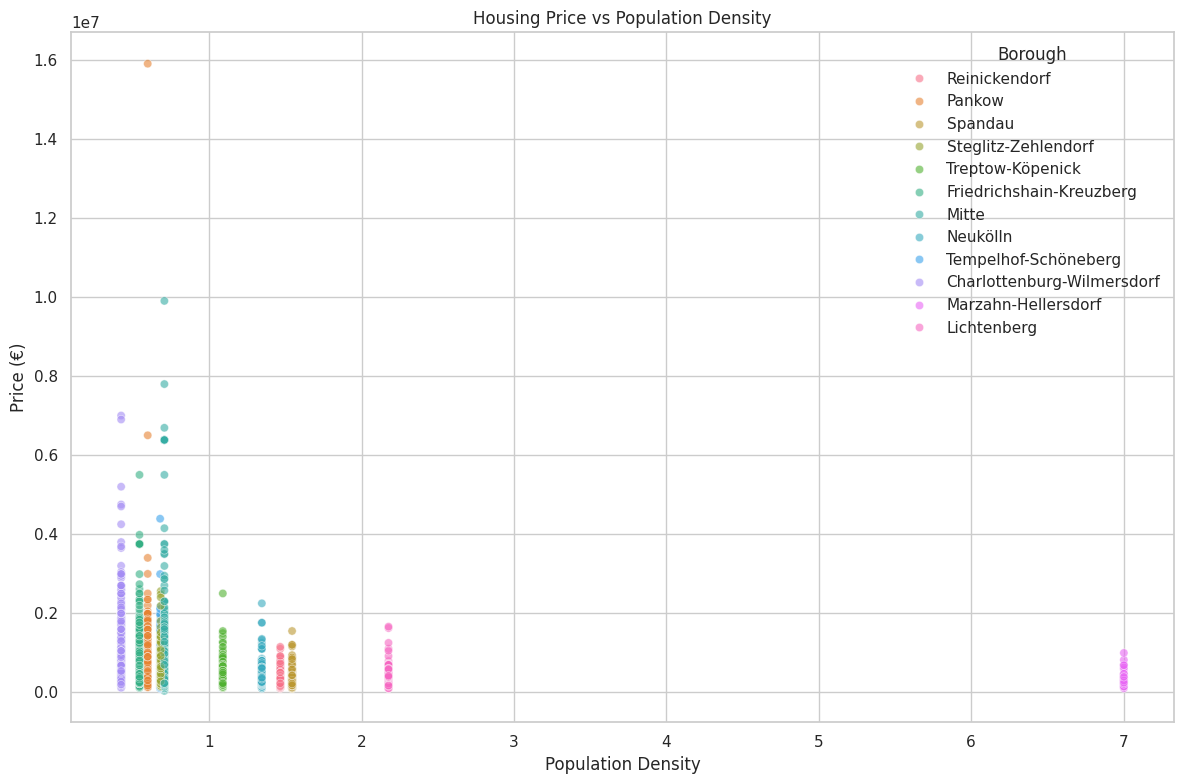

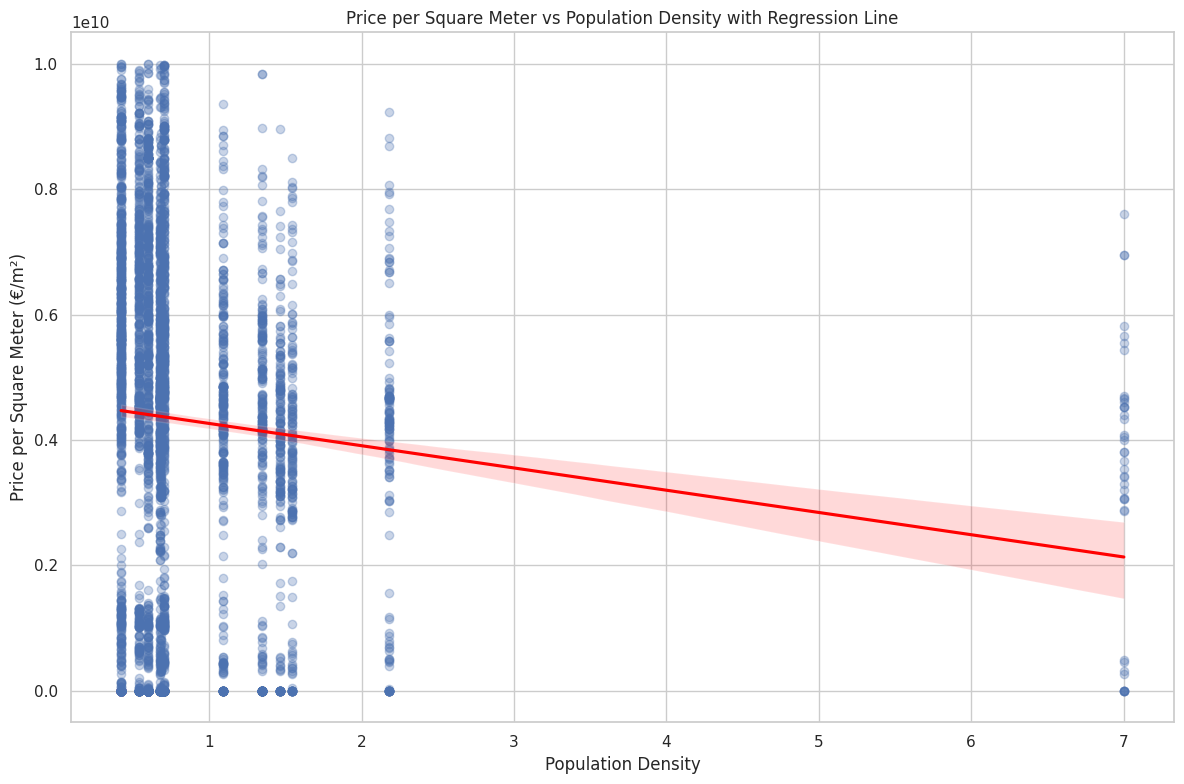

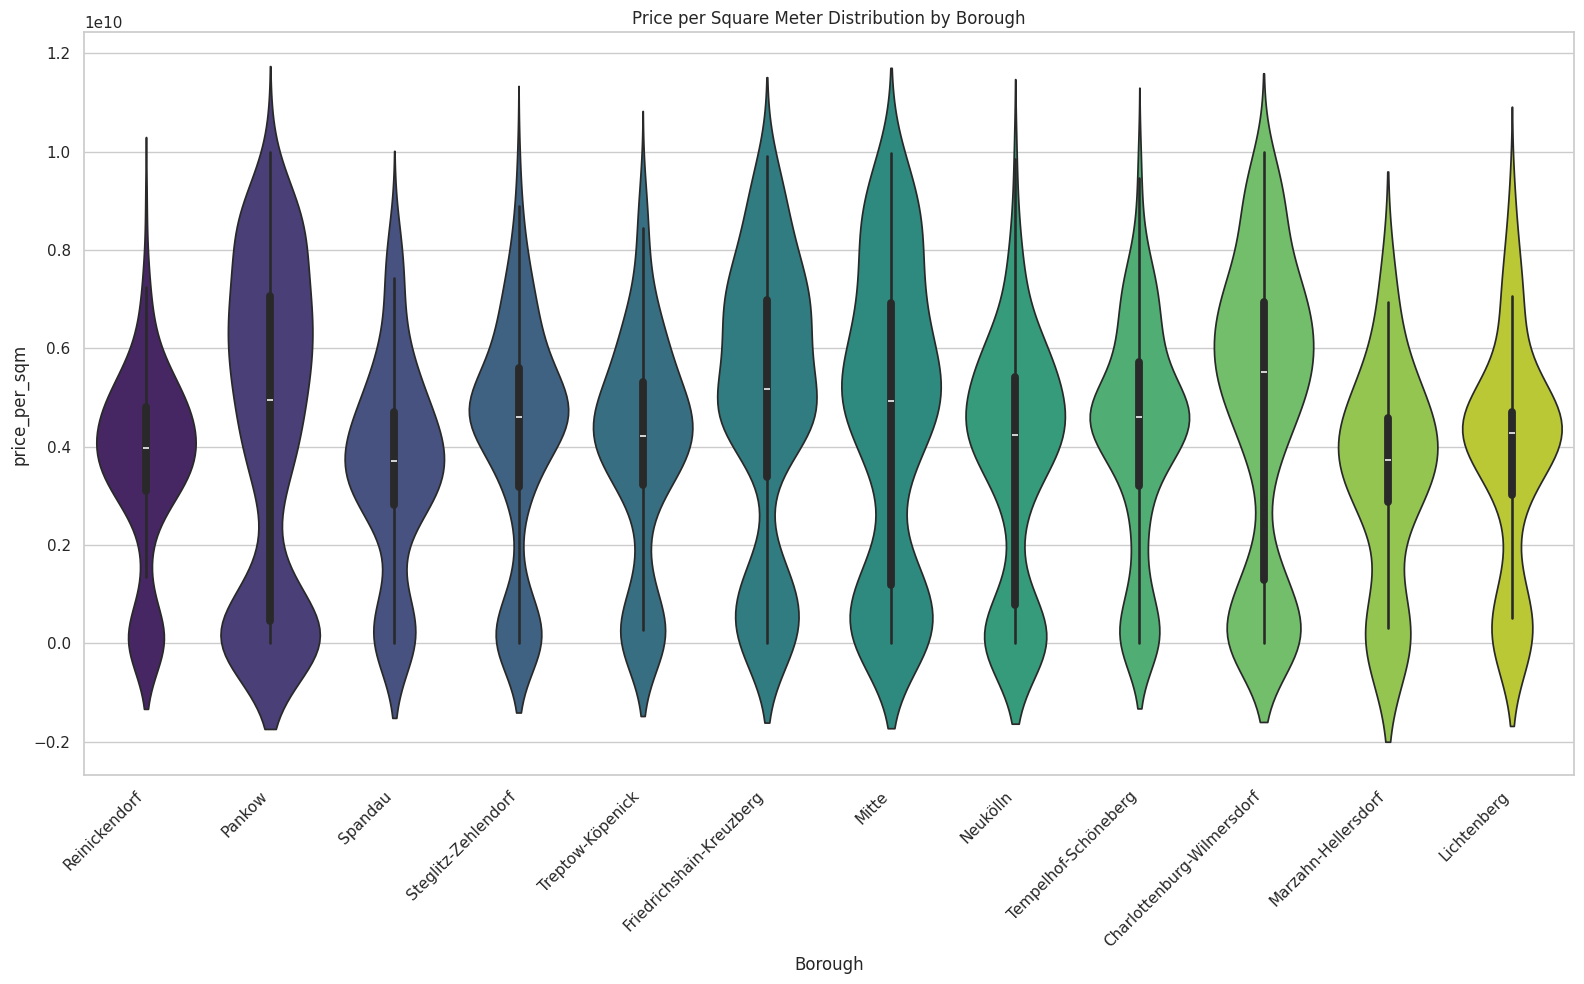

In [18]:
# Population density analysis
df['population_density'] = df['population_per_borough'] / df['Borough'].map(
    df.groupby('Borough')['Borough'].count()
)

# Create a scatter plot of price vs population density
plt.figure(figsize=(12, 8))
sns.scatterplot(x='population_density', y='price', hue='Borough', data=df, alpha=0.6)
plt.title('Housing Price vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot price per sqm vs population density with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='population_density', y='price_per_sqm', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Price per Square Meter vs Population Density with Regression Line')
plt.xlabel('Population Density')
plt.ylabel('Price per Square Meter (€/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a violin plot to show price distribution by borough
plt.figure(figsize=(16, 10))
sns.violinplot(x='Borough', y='price_per_sqm', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Price per Square Meter Distribution by Borough')
plt.tight_layout()
plt.show()


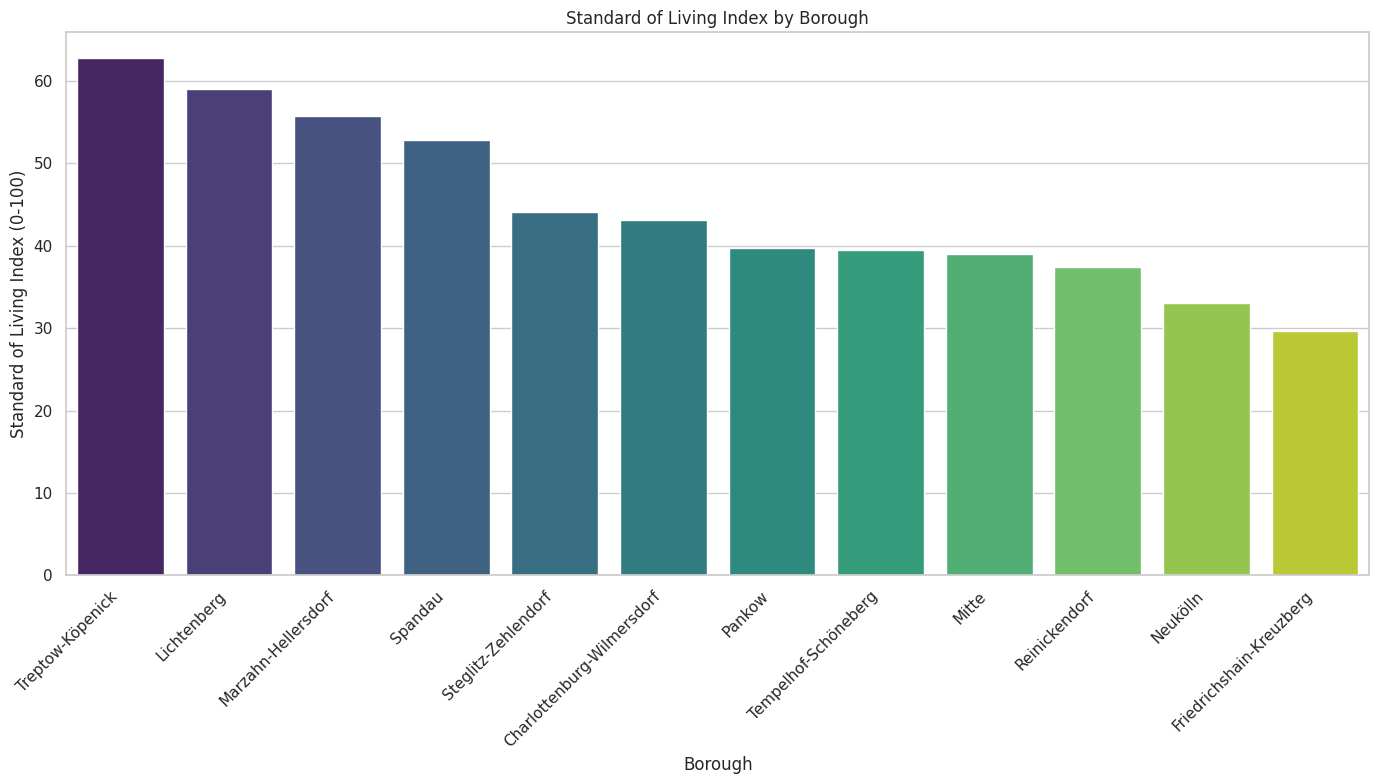

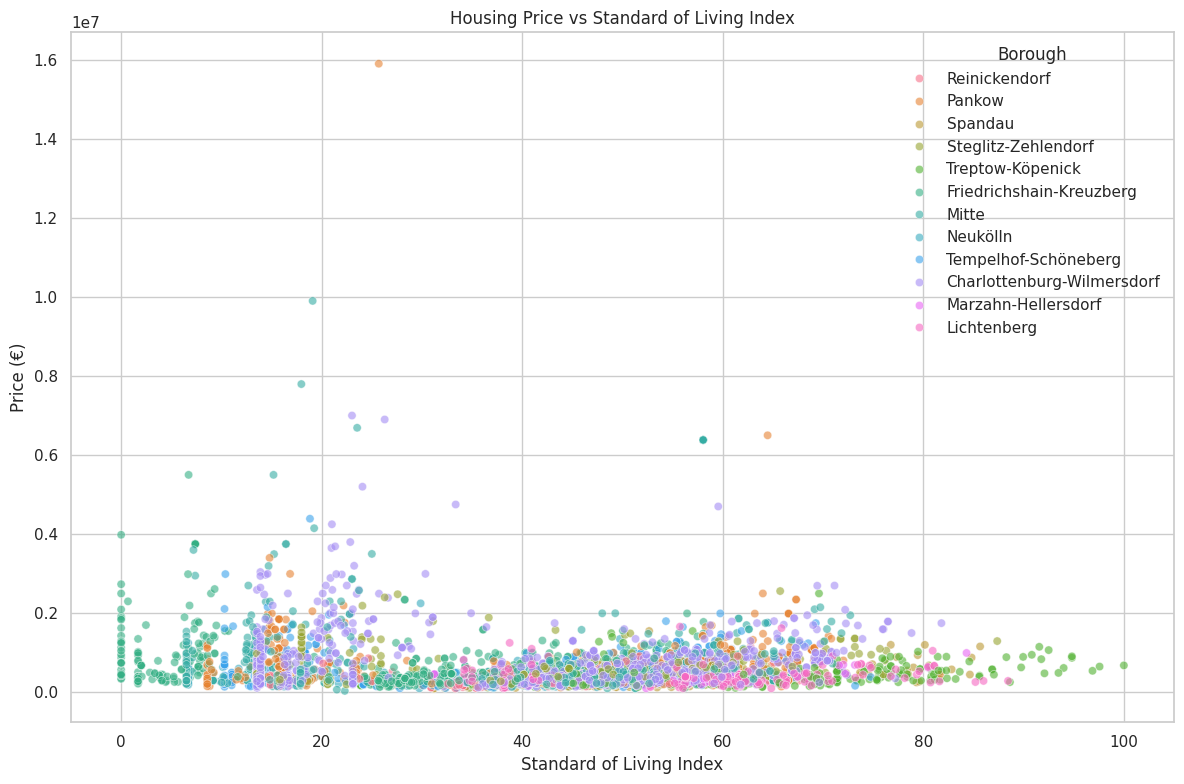

In [19]:
# Standard of living index calculation
# We'll create a composite index based on price_per_sqm, distance_to_center_km, and new_apartment_per_borough
# First, normalize all features to a 0-1 scale

# Create a copy of relevant features
living_standard_df = df[['Borough', 'Neighborhood', 'price_per_sqm',
                         'distance_to_center_km', 'new_apartment_per_borough']].copy()

# Normalize the features (higher values are better for standard of living)
scaler = StandardScaler()
features_to_normalize = ['price_per_sqm', 'new_apartment_per_borough']
living_standard_df[features_to_normalize] = scaler.fit_transform(living_standard_df[features_to_normalize])

# For distance to center, closer is better, so we'll invert it after normalization
living_standard_df['distance_to_center_km'] = scaler.fit_transform(living_standard_df[['distance_to_center_km']])
living_standard_df['distance_to_center_km'] = living_standard_df['distance_to_center_km'] * -1  # Invert so negative distance is good

# Create the standard of living index (weighted sum)
living_standard_df['living_standard_index'] = (
    0.5 * living_standard_df['price_per_sqm'] +  # Higher prices indicate better neighborhoods
    0.3 * living_standard_df['distance_to_center_km'] * -1 +  # Closer to center is better
    0.2 * living_standard_df['new_apartment_per_borough']  # More new apartments indicate development
)

# Normalize the final index for easier interpretation (0-100 scale)
min_val = living_standard_df['living_standard_index'].min()
max_val = living_standard_df['living_standard_index'].max()
living_standard_df['living_standard_index'] = 100 * (living_standard_df['living_standard_index'] - min_val) / (max_val - min_val)

# Calculate average standard of living by borough
borough_living_standard = living_standard_df.groupby('Borough')['living_standard_index'].mean().reset_index()
borough_living_standard = borough_living_standard.sort_values('living_standard_index', ascending=False)

# Visualize the standard of living index by borough
plt.figure(figsize=(14, 8))
sns.barplot(x='Borough', y='living_standard_index', data=borough_living_standard, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Standard of Living Index by Borough')
plt.xlabel('Borough')
plt.ylabel('Standard of Living Index (0-100)')
plt.tight_layout()
plt.show()

# Add living standard index to the original dataframe
df['living_standard_index'] = living_standard_df['living_standard_index']

# Visualize relationship between living standard and price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='living_standard_index', y='price', hue='Borough', data=df, alpha=0.6)
plt.title('Housing Price vs Standard of Living Index')
plt.xlabel('Standard of Living Index')
plt.ylabel('Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Outlier analysis - Calculate Z-scores for price
z_scores = stats.zscore(df['price'])
df['price_zscore'] = z_scores

# Identify outliers (|z-score| > 3)
outliers = df[abs(df['price_zscore']) > 3]
print(f"Number of price outliers detected: {len(outliers)}")

# Visualize outliers
plt.figure(figsize=(14, 8))
plt.scatter(df.index, df['price'], alpha=0.5, label='Normal')
plt.scatter(outliers.index, outliers['price'], color='red', label='Outliers')
plt.axhline(y=df['price'].mean() + 3*df['price'].std(), color='r', linestyle='--', alpha=0.3, label='Upper Threshold (3σ)')
plt.axhline(y=df['price'].mean() - 3*df['price'].std(), color='r', linestyle='--', alpha=0.3, label='Lower Threshold (-3σ)')
plt.title('Price Outlier Detection using Z-score')
plt.xlabel('Index')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution Before Outlier Removal')
plt.xlabel('Price (€)')
plt.tight_layout()
plt.show()

# Create a copy of the dataset without outliers for comparison
df_no_outliers = df[abs(df['price_zscore']) <= 3].copy()

# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['price'])
plt.title('Price Distribution After Outlier Removal')
plt.xlabel('Price (€)')
plt.tight_layout()
plt.show()

# Compare statistics before and after outlier removal
before_after_stats = pd.DataFrame({
    'Before': df['price'].describe(),
    'After': df_no_outliers['price'].describe()
})
before_after_stats


In [ ]:
# More aggressive outlier removal to completely clean the visualizations

# Create a copy of the dataframe for more aggressive cleaning
df_fully_cleaned = df.copy()

# Define a function to remove outliers using IQR method - more aggressive than z-score
def remove_outliers_iqr(df, column, factor=0.75):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to each borough separately
unique_boroughs = df_fully_cleaned['Borough'].unique()
borough_dfs = []

for borough in unique_boroughs:
    borough_df = df_fully_cleaned[df_fully_cleaned['Borough'] == borough]
    cleaned_borough_df = remove_outliers_iqr(borough_df, 'price')
    borough_dfs.append(cleaned_borough_df)

# Combine the cleaned borough dataframes
df_fully_cleaned = pd.concat(borough_dfs)

print(f"Dataset shape before aggressive outlier removal: {df.shape}")
print(f"Dataset shape after aggressive outlier removal: {df_fully_cleaned.shape}")
print(f"Removed {df.shape[0] - df_fully_cleaned.shape[0]} outliers ({(df.shape[0] - df_fully_cleaned.shape[0])/df.shape[0]*100:.2f}% of data)")

# Visualize the fully cleaned data

# 1. Boxplots by Borough after complete outlier removal
plt.figure(figsize=(16, 8))
sns.boxplot(x='Borough', y='price', data=df_fully_cleaned, palette='viridis')
plt.title('Price Distribution by Borough (After Complete Outlier Removal)', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution of key features after complete cleaning
features_to_plot = ['price', 'area', 'rooms', 'price_per_sqm', 'distance_to_center_km']
plt.figure(figsize=(18, 15))

for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i+1)
    sns.histplot(df_fully_cleaned[feature], kde=True, color='green', alpha=0.7)
    plt.title(f'{feature} Distribution (After Complete Outlier Removal)', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Scatter plots with fully cleaned data
plt.figure(figsize=(20, 6))

# Price vs Area
plt.subplot(1, 3, 1)
plt.scatter(df_fully_cleaned['area'], df_fully_cleaned['price'], alpha=0.6, color='green')
plt.title('Price vs Area (Fully Cleaned)')
plt.xlabel('Area (m²)')
plt.ylabel('Price (€)')
plt.grid(True)

# Price vs Rooms
plt.subplot(1, 3, 2)
plt.scatter(df_fully_cleaned['rooms'], df_fully_cleaned['price'], alpha=0.6, color='green')
plt.title('Price vs Rooms (Fully Cleaned)')
plt.xlabel('Rooms')
plt.ylabel('Price (€)')
plt.grid(True)

# Price vs Distance to Center
plt.subplot(1, 3, 3)
plt.scatter(df_fully_cleaned['distance_to_center_km'], df_fully_cleaned['price'], alpha=0.6, color='green')
plt.title('Price vs Distance to Center (Fully Cleaned)')
plt.xlabel('Distance to Center (km)')
plt.ylabel('Price (€)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Interactive visualization showing price distribution by borough
import plotly.express as px

fig = px.box(df_fully_cleaned, x='Borough', y='price',
             title='Price Distribution by Borough (Fully Cleaned Data)',
             labels={'price': 'Price (€)'},
             color='Borough')
fig.update_layout(height=600, width=1000)
fig.update_xaxes(tickangle=45)
fig.show()


In [ ]:
# Analysis of outlier properties
if len(outliers) > 0:
    # Analyze what makes these outliers special
    print("Outlier Analysis:")
    print(f"Mean price of outliers: €{outliers['price'].mean():,.2f}")
    print(f"Mean price of non-outliers: €{df_no_outliers['price'].mean():,.2f}")
    print(f"Mean area of outliers: {outliers['area'].mean():,.2f} m²")
    print(f"Mean area of non-outliers: {df_no_outliers['area'].mean():,.2f} m²")

    # Borough distribution of outliers
    outlier_boroughs = outliers['Borough'].value_counts().reset_index()
    outlier_boroughs.columns = ['Borough', 'Count']

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Borough', y='Count', data=outlier_boroughs)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Outliers by Borough')
    plt.tight_layout()
    plt.show()

    # Compare outliers vs non-outliers for key features
    comparison_features = ['price', 'area', 'rooms', 'price_per_sqm', 'distance_to_center_km',
                           'new_apartment_per_borough', 'population_per_borough']

    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(comparison_features, 1):
        plt.subplot(3, 3, i)

        # Create side-by-side boxplots
        plot_data = pd.DataFrame({
            'Value': pd.concat([outliers[feature], df_no_outliers[feature]]),
            'Group': ['Outliers'] * len(outliers) + ['Normal'] * len(df_no_outliers)
        })

        sns.boxplot(x='Group', y='Value', data=plot_data)
        plt.title(f'Comparison of {feature}')
        plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("No outliers detected.")


In [ ]:
## 3. Data Preparation

# Create a deep copy of the cleaned dataset (without outliers)
df_clean = df_no_outliers.copy()

# Handling missing values
# For numerical features, we'll use the median
for column in df_clean.select_dtypes(include=['int64', 'float64']).columns:
    if df_clean[column].isnull().sum() > 0:
        df_clean[column].fillna(df_clean[column].median(), inplace=True)

# For categorical features, we'll use the most frequent value
for column in df_clean.select_dtypes(include=['object']).columns:
    if df_clean[column].isnull().sum() > 0:
        df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

# Replace 'unbekannt' (unknown) values in categorical columns
for column in df_clean.select_dtypes(include=['object']).columns:
    if 'unbekannt' in df_clean[column].values:
        # Replace with most common non-unknown value
        most_common = df_clean[df_clean[column] != 'unbekannt'][column].mode()[0]
        df_clean[column] = df_clean[column].replace('unbekannt', most_common)

# Feature engineering
# 1. Create age of building feature
df_clean['building_age'] = 2023 - df_clean['construction_year']

# 2. Create interaction terms
df_clean['area_per_room'] = df_clean['area'] / df_clean['rooms']
df_clean['price_to_income_ratio'] = df_clean['price'] / df_clean['population_per_borough']

# 3. Create categorical features based on numerical ranges
df_clean['size_category'] = pd.cut(df_clean['area'],
                                  bins=[0, 50, 75, 100, 150, 1000],
                                  labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

df_clean['price_category'] = pd.cut(df_clean['price'],
                                   bins=[0, 200000, 400000, 600000, 1000000, 10000000],
                                   labels=['Budget', 'Economy', 'Mid-range', 'Premium', 'Luxury'])

# 4. Create distance categories
df_clean['location_category'] = pd.cut(df_clean['distance_to_center_km'],
                                      bins=[0, 5, 10, 15, 50],
                                      labels=['Central', 'Inner City', 'Outer City', 'Suburbs'])

# 5. Convert categorical features using one-hot encoding
categorical_cols = ['energy', 'heating', 'size_category', 'price_category', 'location_category', 'Borough']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Show the shape of the encoded dataset
print(f"Original shape: {df_clean.shape}, Encoded shape: {df_encoded.shape}")

# Display the first few rows of the encoded dataset
df_encoded.head()


In [ ]:
# Feature selection and preparation for modeling

# Select features for modeling (exclude the target variable and redundant features)
exclude_columns = [
    'price', 'price_category', 'price_zscore', 'price_per_sqm', 'price_to_income_ratio',
    'Country', 'City', 'Neighborhood', 'zipcode'
]
feature_columns = [col for col in df_encoded.columns if col not in exclude_columns]

# Create features (X) and target (y)
X = df_encoded[feature_columns]
y = df_encoded['price']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Scale numerical features for better model performance
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Check for any remaining issues
print("\nMissing values in training set:")
print(X_train.isnull().sum().sum())

print("\nMissing values in test set:")
print(X_test.isnull().sum().sum())

# Display correlation with target variable
numeric_df = df_encoded.select_dtypes(include=['number'])  # خُد الأعمدة الرقمية فقط
corr_with_price = numeric_df.corr()['price'].sort_values(ascending=False)

print("\nTop 15 features correlated with price:")
print(corr_with_price[:15])

print("\nBottom 5 features correlated with price:")
print(corr_with_price[-5:])

# Visualize top correlations
plt.figure(figsize=(12, 8))
corr_with_price[:15].plot(kind='bar')
plt.title('Top 15 Features Correlated with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## 4. Modeling: Train and Evaluate Various Models

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    return {
        'model': model.__class__.__name__,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }

# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    XGBRegressor.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

# Train and evaluate all models
results = []
for model in models:
    print(f"Training {model.__class__.__name__}...")
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(result)
    print(f"R² Score (Test): {result['test_r2']:.4f}, RMSE: {result['test_rmse']:.2f}")

# Create a DataFrame with results
results_df = pd.DataFrame(results)
results_df = results_df.set_index('model')
results_df


In [ ]:
# Visualize model performance comparison
plt.figure(figsize=(14, 8))

# Plot R-squared scores
plt.subplot(1, 2, 1)
results_df[['test_r2', 'train_r2', 'cv_r2_mean']].sort_values('test_r2').plot(kind='bar', figsize=(14, 6))
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.grid(True)

# Plot RMSE
plt.subplot(1, 2, 2)
results_df[['test_rmse', 'train_rmse']].sort_values('test_rmse').plot(kind='bar', figsize=(14, 6))
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Identify the best performing model based on test R²
best_model_name = results_df['test_r2'].idxmax()
print(f"Best performing model: {best_model_name} with test R² of {results_df.loc[best_model_name, 'test_r2']:.4f}")

# Find model that has the lowest RMSE on test set
lowest_rmse_model = results_df['test_rmse'].idxmin()
print(f"Model with lowest RMSE: {lowest_rmse_model} with test RMSE of {results_df.loc[lowest_rmse_model, 'test_rmse']:.2f}")


In [ ]:
# Automatically select the best model based on test R²
best_model_name = results_df['test_r2'].idxmax()

# Define hyperparameter grids
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'XGBRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.7, 0.9, 1.0]
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr']
    }
}

model_classes = {
    'RandomForestRegressor': RandomForestRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'XGBRegressor': XGBRegressor.XGBRegressor,
    'Ridge': Ridge
}

best_model_class = model_classes[best_model_name]
param_grid = param_grids[best_model_name]

print(f"Performing Grid Search for {best_model_class.__name__}...")

# Grid SearchCV
grid_search = GridSearchCV(
    best_model_class(random_state=42) if 'random_state' in best_model_class().get_params() else best_model_class(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluate and compare
best_model = grid_search.best_estimator_
best_model_result = evaluate_model(best_model, X_train, X_test, y_train, y_test)

before_after = pd.DataFrame({
    'Before': results_df.loc[best_model_name],
    'After': pd.Series(best_model_result)
}).T[['test_r2', 'test_rmse', 'test_mae']]

print(f"\nBest parameters for {best_model_name}: {grid_search.best_params_}")
print(before_after)


In [ ]:
# Feature importance analysis for the best model
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    })

    # Sort by importance
    feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

    # Display top 20 features
    print("Top 20 Most Important Features:")
    feature_importances.head(20)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 20 Feature Importances - {best_model_class.__name__}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.tight_layout()
    plt.show()

    # Calculate permutation importances (more reliable but slower)
    perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

    # Create DataFrame of permutation importances
    perm_importances = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values('Importance', ascending=False).reset_index(drop=True)

    # Plot permutation importances
    plt.figure(figsize=(12, 8))
    plt.barh(perm_importances['Feature'][:20], perm_importances['Importance'][:20])
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 20 Permutation Importances - {best_model_class.__name__}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    # For linear models
    coefficients = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': best_model.coef_
    })

    # Sort by absolute coefficient values
    coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False).reset_index(drop=True)

    # Display top 20 features
    print("Top 20 Features by Coefficient Magnitude:")
    coefficients.head(20)

    # Plot coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(coefficients['Feature'][:20], coefficients['Coefficient'][:20])
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.title(f'Top 20 Feature Coefficients - {best_model_class.__name__}')
    plt.gca().invert_yaxis()
    plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Feature importance not directly available for this model type.")


In [ ]:
## 5. Model Evaluation and Residual Analysis

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred
abs_residuals = np.abs(residuals)
percent_error = abs_residuals / y_test * 100

# Print summary statistics
print("Residual Summary Statistics:")
print(f"Mean Residual: {residuals.mean():.2f}")
print(f"Mean Absolute Error: {abs_residuals.mean():.2f}")
print(f"Median Absolute Error: {np.median(abs_residuals):.2f}")
print(f"Mean Percentage Error: {percent_error.mean():.2f}%")
print(f"90th Percentile of Absolute Error: {np.percentile(abs_residuals, 90):.2f}")
print(f"95th Percentile of Absolute Error: {np.percentile(abs_residuals, 95):.2f}")

# Create a DataFrame for visualization
residual_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals,
    'Abs_Residual': abs_residuals,
    'Percent_Error': percent_error
})

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (€)')
plt.ylabel('Predicted Price (€)')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (€)')
plt.ylabel('Residual (€)')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Plot percentage errors
plt.figure(figsize=(12, 8))
plt.hist(percent_error, bins=30, edgecolor='k')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Percentage Error Distribution')
plt.axvline(x=10, color='r', linestyle='--', alpha=0.3, label='10% Error')
plt.axvline(x=20, color='g', linestyle='--', alpha=0.3, label='20% Error')
plt.legend()
plt.tight_layout()
plt.show()

# Identify poor predictions (high errors)
poor_predictions = residual_df[residual_df['Percent_Error'] > 20].sort_values('Percent_Error', ascending=False)
print(f"\nNumber of predictions with >20% error: {len(poor_predictions)} ({len(poor_predictions)/len(y_test)*100:.2f}% of test set)")

# Show examples of worst predictions
print("\nWorst 10 Predictions:")
poor_predictions.head(10)


In [ ]:
# Additional spatial analysis: error distribution by borough
# We need to get borough information back for the test set
# Create a mapping of index to borough
idx_to_borough = df_clean['Borough'].reset_index().set_index('index')['Borough']

# Get borough for test indices
test_idx_borough = pd.Series(idx_to_borough.loc[y_test.index].values, index=y_test.index)
residual_df['Borough'] = test_idx_borough

# Calculate mean absolute error by borough
error_by_borough = residual_df.groupby('Borough')['Abs_Residual'].agg(['mean', 'median', 'count']).reset_index()
error_by_borough = error_by_borough.sort_values('mean', ascending=False)

# Visualize errors by borough
plt.figure(figsize=(14, 8))
sns.barplot(x='Borough', y='mean', data=error_by_borough, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error by Borough')
plt.ylabel('Mean Absolute Error (€)')
plt.tight_layout()
plt.show()

# Create an interactive visualization of percentage errors by borough
fig = px.box(residual_df, x='Borough', y='Percent_Error',
             title='Percentage Error Distribution by Borough',
             labels={'Percent_Error': 'Percentage Error (%)', 'Borough': 'Borough'})
fig.update_layout(height=600, width=900)
fig.update_xaxes(tickangle=45)
fig.show()

# Analyze errors by price range
residual_df['Price_Range'] = pd.cut(residual_df['Actual'],
                                   bins=[0, 200000, 400000, 600000, 1000000, 10000000],
                                   labels=['Budget', 'Economy', 'Mid-range', 'Premium', 'Luxury'])

error_by_price_range = residual_df.groupby('Price_Range')['Percent_Error'].agg(['mean', 'median', 'count']).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Price_Range', y='mean', data=error_by_price_range, palette='viridis')
plt.title('Mean Percentage Error by Price Range')
plt.ylabel('Mean Percentage Error (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## 6. Clustering Analysis for Market Segmentation

# Let's apply K-means clustering to identify different housing segments in Berlin
# We'll use numerical features that might define different market segments

# Select features for clustering
cluster_features = ['price_per_sqm', 'area', 'rooms', 'distance_to_center_km',
                    'construction_year', 'living_standard_index', 'population_density']

# Get data for clustering
cluster_data = df_clean[cluster_features].copy()

# Scale the data for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Based on the elbow curve, select optimal number of clusters (let's say 4)
n_clusters = 4  # This would be decided based on the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to the original data
df_clean['cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_stats = df_clean.groupby('cluster').agg({
    'price': ['mean', 'median'],
    'area': 'mean',
    'rooms': 'mean',
    'distance_to_center_km': 'mean',
    'construction_year': 'mean',
    'living_standard_index': 'mean',
    'price_per_sqm': 'mean',
    'population_density': 'mean'
}).reset_index()

# Rename columns for better readability
cluster_stats.columns = ['Cluster', 'Mean Price', 'Median Price', 'Mean Area', 'Mean Rooms',
                         'Mean Distance to Center', 'Mean Construction Year',
                         'Mean Living Standard', 'Mean Price/m²', 'Mean Population Density']

# Display cluster statistics
print("Housing Market Segments:")
cluster_stats = cluster_stats.sort_values('Mean Price/m²', ascending=False)
cluster_stats

# Visualize clusters with a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['price_per_sqm'], df_clean['area'],
                      c=df_clean['cluster'], cmap='viridis',
                      alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Price per Square Meter (€/m²)')
plt.ylabel('Area (m²)')
plt.title('Housing Clusters by Price/m² and Area')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a 3D visualization of clusters
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df_clean['price_per_sqm'], df_clean['area'], df_clean['distance_to_center_km'],
                    c=df_clean['cluster'], cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel('Price per m²')
ax.set_ylabel('Area (m²)')
ax.set_zlabel('Distance to Center (km)')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Visualization of Housing Clusters')
plt.tight_layout()
plt.show()

# Create an interactive plot with Plotly
fig = px.scatter_3d(df_clean, x='price_per_sqm', y='area', z='distance_to_center_km',
                   color='cluster', hover_data=['price', 'rooms', 'Borough', 'construction_year'],
                   labels={'price_per_sqm': 'Price per m²',
                           'area': 'Area (m²)',
                           'distance_to_center_km': 'Distance to Center (km)'},
                   title='Interactive 3D Visualization of Housing Market Segments')
fig.update_layout(height=800, width=1000)
fig.show()


In [ ]:
## Future Work and Recommendations

# Areas for further improvement and recommendations
future_work_md = """
## Recommendations for Future Work

### Model Enhancements
- Collect more data on property features (amenities, renovation status, etc.)
- Incorporate time-series analysis to capture price trends over time
- Develop borough-specific models for more accurate local predictions
- Add external data sources such as public transport accessibility
- Implement more advanced feature selection techniques

### Business Applications
- Develop a web application for real estate agents and potential buyers
- Create an API service for integration with real estate platforms
- Generate automated valuation reports for properties
- Implement periodic retraining to keep the model updated
- Extend the analysis to rental prices for a complete market view

### Market Analysis
- Further analyze the relationship between population density and housing prices
- Investigate the impact of new construction projects on surrounding property values
- Study the effect of gentrification on neighborhood price trends
- Evaluate the return on investment for different property types across boroughs

### Visualization Improvements
- Create interactive maps showing price variations across Berlin
- Develop dynamic dashboards for real estate market monitoring
- Add comparative analysis tools to benchmark properties against similar ones
"""

# Print the recommendations
print(future_work_md)


In [ ]:
## Save the Model and Important Components

import pickle

# Save the best model
with open('berlin_housing_price_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler for future preprocessing
with open('berlin_housing_price_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save feature names for future reference
model_features = {
    'feature_names': list(X_train.columns),
    'categorical_features': categorical_cols,
    'numerical_features': list(num_features),
    'target': 'price'
}

with open('berlin_housing_price_features.pkl', 'wb') as features_file:
    pickle.dump(model_features, features_file)

# Save borough statistics for reference
with open('berlin_borough_stats.pkl', 'wb') as stats_file:
    pickle.dump(borough_stats, stats_file)

print("Model and supporting files saved successfully!")
print("Files created:")
print("- berlin_housing_price_model.pkl")
print("- berlin_housing_price_scaler.pkl")
print("- berlin_housing_price_features.pkl")
print("- berlin_borough_stats.pkl")
